# Escuela-Congreso 100YQR: Protocolos de Información & Computación Cuántica Usando Fotones

---

## Sesión 1 Taller (30-09-2025)

---

$\newcommand{\ket}[1]{| #1 \rangle}$
$\newcommand{\bra}[1]{\langle #1 |}$
$\newcommand{\braket}[2]{\langle #1 | #2 \rangle}$

## ¿Qué son las Bases Mutuamente Insesgadas?

Las Bases Mutuamente Insesgadas (MUBs por las siglas en inglés de *Mutually Unbiased Bases*) es un conjunto de bases de un espacio de Hilbert $\mathbb{C}^d$ tales que cuando un sistema cuántico se prepara en un estado cualquiera de una de estas bases, la distribución de probabilidad de los resultados de una medición de este sistema en cualquier otra de las bases es uniforme.

Matemáticamente, dos bases ortonormales diferentes $B^{(\alpha)}=\{\ket{\varphi_0^{(\alpha)}}, \dots, \ket{\varphi_{d-1}^{(\alpha)}} \} $ y $B^{(\alpha')}=\{\ket{\varphi_0^{(\alpha')}}, \dots, \ket{\varphi_{d-1}^{(\alpha')}} \} $ en $\mathbb{C}^d$ son MUBs si y solo si

$$
| \braket{\varphi_j^{(\alpha)}}{\varphi_k^{(\alpha')}}|^2 = 1/d \qquad \forall j,k\in\{0,\dots,d-1\}.
$$

Si la dimensión $d$ del espacio de Hilbert es una potencia entera de un número primo, i.e. $d=p^n$ siendo $p$ primo y $n$ un entero positivo, entonces sabemos que en este espacio se pueden encontrar, como máximo, $d+1$ bases mutuamente insesgadas. Para dimensiones $d$ arbitrarias, el número máximo de bases mutuamente insesgadas es desconocido y permanece una pregunta abierta.

> Ejercicio: De un ejemplo de dos bases que sean mutuamente insesgadas en d=2 y sus correspondientes realizaciones en sistemas físicos (qubits).

A cada base $B^{(\beta)}$ en $\mathbb{C}^d$ le podemos asociar una transformación unitaria

$$
U_\beta = \sum_j \ket{\varphi_j^{(\beta)}} \bra{e_j}
$$

que satisface $U_\beta \ket{e_j} = \ket{\varphi_j^{(\beta)}}$, siendo $\ket{e_j}$ el $j$-ésimo estado de la base computacional (también se usa la notación $\ket{j}$, que es más común en la literatura). La matriz asociada a esta transformación en la base computacional puede expresarse fácilmente organizando los estados de la base $B^{(\beta)}$ como las columnas de la matriz, i.e.

$$
U_\beta = \begin{pmatrix}
\braket{e_0}{\varphi_0^{(\beta)}} & \braket{e_0}{\varphi_1^{(\beta)}} & \dots & \braket{e_0}{\varphi_{d-1}^{(\beta)}} \\
\braket{e_1}{\varphi_0^{(\beta)}} & \braket{e_1}{\varphi_1^{(\beta)}} & \dots & \braket{e_1}{\varphi_{d-1}^{(\beta)}} \\
\vdots & \vdots & \ddots & \vdots \\
\braket{e_{d-1}}{\varphi_0^{(\beta)}} & \braket{e_{d-1}}{\varphi_1^{(\beta)}} & \dots & \braket{e_{d-1}}{\varphi_{d-1}^{(\beta)}} \\
\end{pmatrix}.
$$

> Ejercicio: Muestre que todos los elementos de matriz del producto $U_\alpha^\dagger U_{\alpha'}$ para dos MUBs $B^{(\alpha)}$ y $B^{(\alpha')}$ pueden escribirse como $e^{i\theta}/\sqrt{d}$, siendo $\theta$ una fase que depende de la fila y la columna. Halle las tres MUBs asociadas a los operadores de Pauli cuando $d=2$ y verifique este último resultado.

In [1]:
!pip install cmocean
import numpy as np
import matplotlib.pyplot as plt
import cmocean

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 3.9 MB/s eta 0:00:00


In [2]:
# Build the three unitaries

U_z = np.array([[1, 0],
                [0, 1]],
               dtype="complex")

U_x = 1/np.sqrt(2)*np.array([ [1, 1],
                              [1,-1]],
                            dtype="complex")

U_y = 1/np.sqrt(2)*np.array([ [1 , 1],
                              [1j,-1j]],
                            dtype="complex")

In [3]:
# Multiply

Uzx = np.conjugate(U_z.T) @ U_x

Uzy = np.conjugate(U_z.T) @ U_y

Uxy = np.conjugate(U_x.T) @ U_y


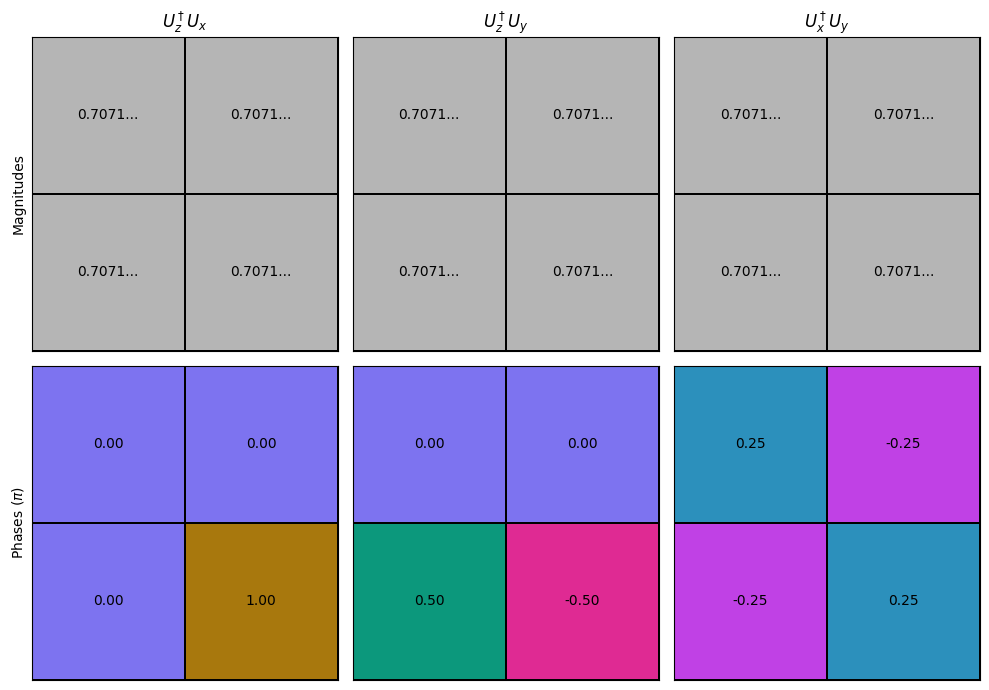

In [4]:
# Visualize

U = [Uzx, Uzy, Uxy]
names = [r"$U_z^\dagger U_x$",r"$U_z^\dagger U_y$",r"$U_x^\dagger U_y$"]

fig, ax = plt.subplots(2,3, figsize=(10,7))

for i in range(3):
  ax[0,i].pcolormesh(np.abs(U[i]), vmin=0, vmax=1, cmap="gray", linewidths=0.01, edgecolor="k")
  ax[1,i].pcolormesh(np.angle(U[i])/np.pi, vmin=-1, vmax=1, cmap=cmocean.cm.phase, linewidths=0.01, edgecolor="k")
  ax[0,i].set_title(names[i])
  ax[0,i].invert_yaxis()
  ax[1,i].invert_yaxis()
  ax[0,i].get_xaxis().set_ticks([])
  ax[1,i].get_xaxis().set_ticks([])
  ax[0,i].get_yaxis().set_ticks([])
  ax[1,i].get_yaxis().set_ticks([])
  for j in range(2):
    for k in range(2):
      ax[0,i].text(k+0.5, j+0.5, "{:.4f}...".format(np.abs(U[i])[j, k]), ha="center", va="center", color="k")
      ax[1,i].text(k+0.5, j+0.5, "{:.2f}".format(np.angle(U[i])[j, k]/np.pi), ha="center", va="center", color="k")


ax[0,0].set_ylabel("Magnitudes")
ax[1,0].set_ylabel(r"Phases ($\pi$)")

fig.set_tight_layout(True)
plt.show()

Otra forma de visualizar las MUBs es graficando las distribuciones de probabilidad asociadas a los resultados de las 6x6 proyecciones de cada estado de las tres MUBs sobre los demás, i.e. como una matriz de 3x3 bloques 2x2, cada bloque asociado a una base fija.

In [5]:
P_dist = np.zeros((6,6))

U = [U_z, U_x, U_y]

for i in range(3):
  for j in range(3):
    P_dist[2*i:2*i+2,2*j:2*j+2] = np.abs(np.conjugate(U[i].T) @ U[j])**2

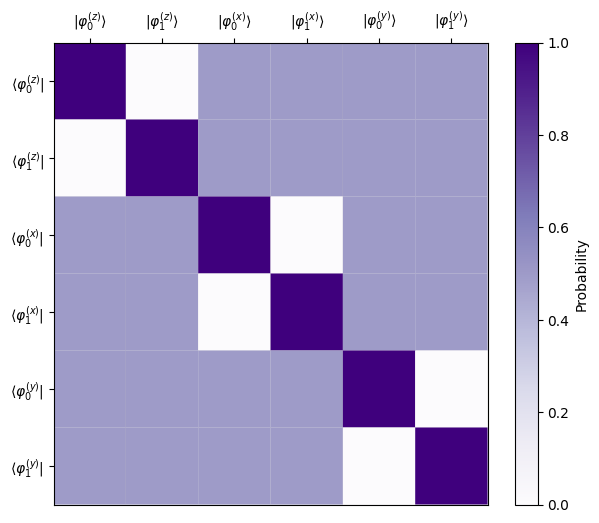

In [6]:
fig = plt.figure(figsize=(7,6))

ax = fig.gca()

ax.pcolor(P_dist, vmin=0, vmax=1, cmap="Purples", linewidths=0.01, edgecolor="k")
fig.colorbar(ax.get_children()[0],label = "Probability")
ax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5])
ax.set_yticks([0.5,1.5,2.5,3.5,4.5,5.5], )
ax.set_xticklabels([r"$|\varphi^{(z)}_0 \rangle$",r"$|\varphi^{(z)}_1 \rangle$",r"$|\varphi^{(x)}_0 \rangle$",r"$|\varphi^{(x)}_1 \rangle$",r"$|\varphi^{(y)}_0 \rangle$",r"$|\varphi^{(y)}_1 \rangle$"])
ax.xaxis.tick_top()
ax.set_yticklabels([r"$\langle \varphi^{(z)}_0 |$",r"$\langle \varphi^{(z)}_1 |$",r"$\langle \varphi^{(x)}_0 |$",r"$\langle \varphi^{(x)}_1 |$",r"$ \langle \varphi^{(y)}_0 |$",r"$\langle \varphi^{(y)}_1 |$"])
ax.invert_yaxis()
plt.show()

Aquí podemos visualizar otro ejemplo para el caso de dos MUBs en d=16 dimensiones, tomadas de https://arxiv.org/abs/1308.0019.

In [7]:
U1 = np.array([[1,-1, 1, 1,-1, 1,-1, 1,-1, 1, 1, 1, 1, 1,-1,-1],
              [-1, 1, 1, 1,-1, 1, 1,-1, 1, 1,-1,-1, 1, 1, 1,-1],
              [ 1, 1, 1,-1, 1,-1, 1, 1,-1, 1,-1, 1, 1,-1, 1,-1],
              [ 1, 1,-1, 1, 1, 1, 1,-1, 1,-1, 1, 1, 1,-1,-1,-1],
              [-1,-1, 1, 1, 1,-1, 1, 1, 1,-1, 1, 1,-1, 1, 1,-1],
              [ 1, 1,-1, 1,-1, 1, 1, 1,-1,-1,-1, 1,-1, 1, 1, 1],
              [-1, 1, 1, 1, 1, 1, 1, 1,-1, 1, 1,-1,-1,-1,-1, 1],
              [ 1,-1, 1,-1, 1, 1, 1, 1, 1,-1,-1,-1, 1, 1,-1, 1],
              [-1, 1,-1, 1, 1,-1,-1, 1, 1, 1,-1, 1, 1, 1,-1, 1],
              [ 1, 1, 1,-1,-1,-1, 1,-1, 1, 1, 1, 1,-1, 1,-1, 1],
              [ 1,-1,-1, 1, 1,-1, 1,-1,-1, 1, 1,-1, 1, 1, 1, 1],
              [ 1,-1, 1, 1, 1, 1,-1,-1, 1, 1,-1, 1,-1,-1, 1, 1],
              [ 1, 1, 1, 1,-1,-1,-1, 1, 1,-1, 1,-1, 1,-1, 1, 1],
              [ 1, 1,-1,-1, 1, 1,-1, 1, 1, 1, 1,-1,-1, 1, 1,-1],
              [-1, 1, 1,-1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1],
              [-1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1,-1, 1, 1]])/np.sqrt(16)

U2 = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [ 1, 1,-1, 1, 1,-1,-1, 1,-1, 1,-1,-1,-1,-1, 1, 1],
              [ 1,-1, 1, 1,-1,-1, 1,-1, 1,-1,-1,-1,-1, 1, 1, 1],
              [ 1, 1, 1,-1,-1, 1,-1, 1,-1,-1,-1,-1, 1, 1, 1,-1],
              [ 1, 1,-1,-1, 1,-1, 1,-1,-1,-1,-1, 1, 1, 1,-1, 1],
              [ 1,-1,-1, 1,-1, 1,-1,-1,-1,-1, 1, 1, 1,-1, 1, 1],
              [ 1,-1, 1,-1, 1,-1,-1,-1,-1, 1, 1, 1,-1, 1, 1,-1],
              [ 1, 1,-1, 1,-1,-1,-1,-1, 1, 1, 1,-1, 1, 1,-1,-1],
              [ 1,-1, 1,-1,-1,-1,-1, 1, 1, 1,-1, 1, 1,-1,-1, 1],
              [ 1, 1,-1,-1,-1,-1, 1, 1, 1,-1, 1, 1,-1,-1, 1,-1],
              [ 1,-1,-1,-1,-1, 1, 1, 1,-1, 1, 1,-1,-1, 1,-1, 1],
              [ 1,-1,-1,-1, 1, 1, 1,-1, 1, 1,-1,-1, 1,-1, 1,-1],
              [ 1,-1,-1, 1, 1, 1,-1, 1, 1,-1,-1, 1,-1, 1,-1,-1],
              [ 1,-1, 1, 1, 1,-1, 1, 1,-1,-1, 1,-1, 1,-1,-1,-1],
              [ 1, 1, 1, 1,-1, 1, 1,-1,-1, 1,-1, 1,-1,-1,-1,-1],
              [ 1, 1, 1,-1, 1, 1,-1,-1, 1,-1, 1,-1,-1,-1,-1, 1]])/np.sqrt(16)

In [8]:
U12 = np.conjugate(U1.T) @ U2

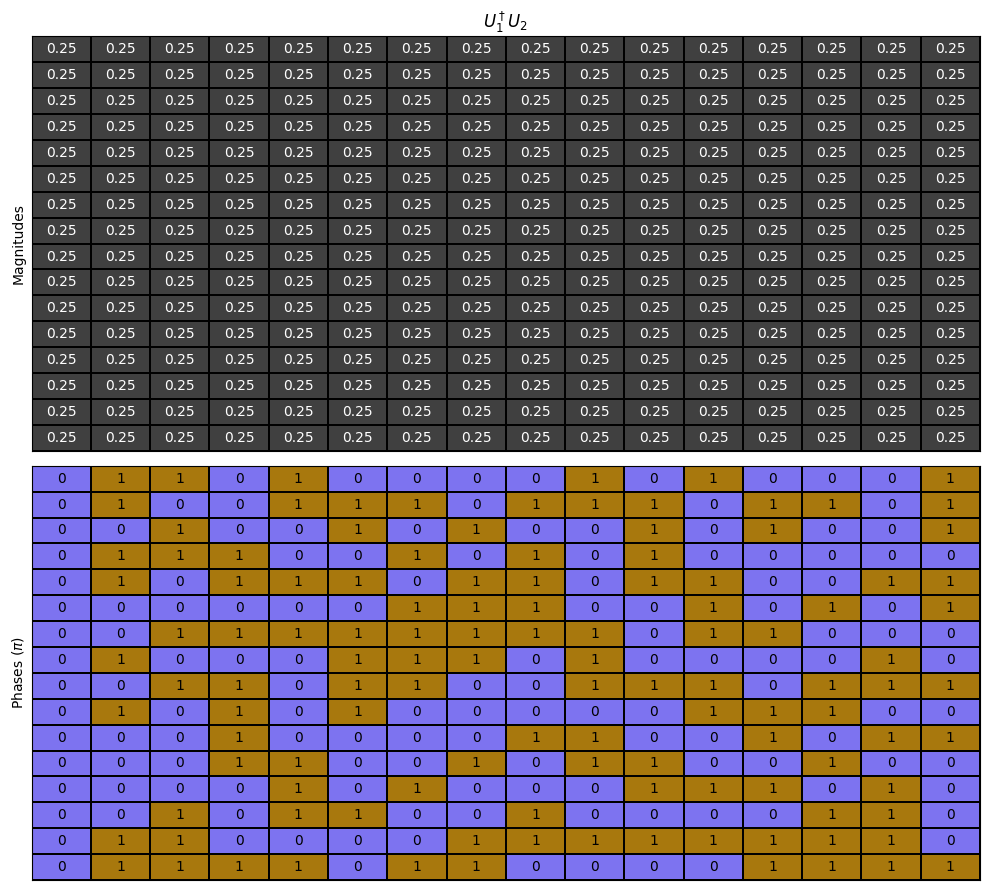

In [9]:
# Visualize

names = [r"$U_z^\dagger U_x$",r"$U_z^\dagger U_y$",r"$U_x^\dagger U_y$"]

fig, ax = plt.subplots(2,1, figsize=(10,9))

ax[0].pcolormesh(np.abs(U12), vmin=0, vmax=1, cmap="gray", linewidths=0.01, edgecolor="k")
ax[1].pcolormesh(np.angle(U12), vmin=-np.pi, vmax=np.pi, cmap=cmocean.cm.phase, linewidths=0.01, edgecolor="k")
ax[0].set_title(r"$U_1^\dagger U_2$")
ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[0].get_xaxis().set_ticks([])
ax[1].get_xaxis().set_ticks([])
ax[0].get_yaxis().set_ticks([])
ax[1].get_yaxis().set_ticks([])
for j in range(16):
  for k in range(16):
    ax[0].text(k+0.5, j+0.5, "{:.2f}".format(np.abs(U12)[j, k]), ha="center", va="center", color="w")
    ax[1].text(k+0.5, j+0.5, "{:.0f}".format(np.angle(U12)[j, k]/np.pi), ha="center", va="center", color="k")


ax[0].set_ylabel("Magnitudes")
ax[1].set_ylabel(r"Phases ($\pi$)")

fig.set_tight_layout(True)
plt.show()

---


# ¿Cómo medir en diferentes MUBs en el laboratorio?

Una realización física de un sistema cuántico bidimensional o *qubit* comúnmente usada en telecomunicaciones y criptografía está dada por los diferentes estados de polarización que puede tener un fotón. Un estado arbitrario de polarización de un fotón puede describirse como una superposición de los estados de polarización lineal horizontal $\ket{H}$ y vertical $\ket{V}$, i.e.

$$
\ket{\psi} = a \ket{H} + b \ket{V},
$$

donde $a$ y $b$ son números complejos arbitrarios. Definiendo la base $\{\ket{H},\ket{V}\}$ como la base computacional ($\ket{H}=\ket{0}$ y $\ket{V}=\ket{1}$), podemos escribir $\ket{\psi}$ de forma matricial como

$$
\ket{\psi} = \begin{pmatrix} a \\ b \end{pmatrix}.
$$

Si, además, exigimos que el estado esté normalizado ($|a|^2+|b|^2 = 1$) y fijamos su fase global (la cual carece de significado físico), entonces podemos describir completamente un estado arbitrario de polarización usando dos parámetros reales $\theta$ y $\phi$ de la forma

$$
\ket{\psi} = \begin{pmatrix} \cos \frac{\theta}{2} \\ e^{i\phi}\sin \frac{\theta}{2} \end{pmatrix} \qquad 0 \leq \theta \leq \pi , \  0 \leq \phi < 2\pi.
$$

Los parámetros $\theta$ y $\phi$ pueden interpretarse como los ángulos polar y azimutal de coordenadas esféricas, lo cuál permite hacer una asociación uno-a-uno entre los estados de polarización de un fotón y los puntos de una esfera. A esta esfera se le conoce como la esfera de Bloch.

![Esfera de Bloch](https://i.sstatic.net/1wJkLm.png)

> Ejercicio: Ilustre en la esfera de Bloch las tres MUBs asociadas a los operadores de Pauli. ¿Puede inferir a qué estados de polarización conocidos de la óptica corresponden los estados de estas bases?

Una medición en la base computacional puede realizarse en este contexto utilizando un divisor de haz polarizante y dos fotodetectores lo suficientemente sensibles que permitan el conteo de fotones individuales. El mecanismo de esta medición es sencillo. El beam splitter polarizante transmite la luz con polarización lineal horizontal y refleja la luz con polarización lineal vertical, codificando la información de la polarización en la información de camino. Si en ambas salidas se disponen dos fotodetectores, podemos asociar el click de un detector específico con el resultado de la medición.

![PBS](https://cdn.specpick.com/images//general/5_638110051969297575.jpg)

Si se hace una medición en la base computacional sobre un fotón con estado de polarización $\ket{\psi}$, las probabilidades $P_0$ y $P_1$ de medir los resultados $0$ (el estado $\ket{H}$) y $1$ (el estado $\ket{V}$) respectivamente son

$$
P_0 = \braket{0}{\psi}\braket{\psi}{0} = \cos^2\frac{\theta}{2} \qquad P_1 = \braket{1}{\psi}\braket{\psi}{1} = \sin^2\frac{\theta}{2}.
$$

Con esto en mente, ¿cómo podemos entonces implementar mediciones en otras bases? Primero, notamos que si midiésemos el mismo estado en otra base $B^{(\beta)} = \{\ket{\varphi_0^{(\beta)}}, \ket{\varphi_1^{(\beta)}} \}$, las probabilidades de obtener los resultados $0_\beta$ (el estado $\ket{\varphi_0}^{(\beta)}$) y $1_\beta$ (el estado $\ket{\varphi_1^{(\beta)}}$) están dadas por

$$
P_j^{(\beta)} = \braket{\varphi_j^{(\beta)}}{\psi}\braket{\psi}{\varphi_j^{(\beta)}} = \bra{j}U_\beta^\dagger\ket{\psi}\bra{\psi}U_\beta\ket{j} = \braket{j}{\psi_\beta}\braket{\psi_\beta}{j} \qquad j=0,1,
$$

donde $\ket{\psi_\beta}=U^\dagger_\beta \ket{\psi}$. Esta ecuación nos sugiere que una forma de hacer una medición en una base arbitraria $B^{(\beta)}$ es transformando el estado del sistema acorde a un unitario $U^\dagger_\beta$ y luego haciendo una medición en la base computacional.

Así, podemos usar elementos ópticos lineales como láminas de media (HWP por Half-Wave Plate) y cuarto de onda (QWP por Quarter-Wave Plate), para transformar el estado de polarización del fotón antes de que este pase por el beam splitter polarizante y sea absobido por el fotodetector. Estas láminas son fabricadas usando cristales birefringentes de tal forma que cuando un fotón las atraviesa perpendicularmente, su estado de polarización cambia de acuerdo a las matrices unitarias

$$
Q(\theta) = e^{-i\pi/4} \begin{pmatrix} cos^2\theta + i\sin^2\theta & (1-i)sin\theta\cos\theta \\ (1-i)sin\theta\cos\theta & \sin^2\theta + i \cos^2\theta \end{pmatrix}, \\
H(\theta) = e^{-i\pi/2} \begin{pmatrix} \cos2\theta & \sin2\theta \\ \sin2\theta & -\cos2\theta \end{pmatrix},
$$

donde $\theta$ es el ángulo que hace el eje rápido del cristal con el eje que define la polarización horizontal. En principio, cualquier rotación arbitraria en la esfera de Bloch puede ser implementada usando tres láminas de onda en diferentes órdenes (Q-H-Q, Q-Q-H y H-Q-Q) (https://arxiv.org/abs/2403.06665v3).

> Ejercicio: Dada esta información, diseñe tres esquemas experimentales que le permitan hacer una medición en las tres MUBs asociadas a los operadores de Pauli.

> Ejercicio: Halle numéricamente (programando, así como en este notebook) las distribuciones de probabilidad de los resultados de medición del estado $\ket{D}=(\ket{0} + \ket{1})/\sqrt2$ en las tres MUBs asociadas a los operadores de Pauli.